In [1]:
import pandas as pd

In [116]:
df = pd.read_csv('Expanded_data_with_more_features.csv')
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [40]:
df.ParentEduc.unique()


array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school', nan],
      dtype=object)

In [117]:
import numpy as np

parentEduc = {np.nan : 0, 
              'some high school' : 1,
              'high school' : 2,
              'some college' : 3,
              "associate's degree" : 4,
              "bachelor's degree" : 5,
              "master's degree" : 6}

In [118]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

df.Gender = lb.fit_transform(df.Gender)

# So we can change genders to numbers. 

In [119]:
 # Both Lunch and transport could indicate economic status, which could be correlated to the grades
print (df.LunchType.unique())
print(df.TransportMeans.unique())

['standard' 'free/reduced']
['school_bus' nan 'private']


In [120]:
df.LunchType = lb.fit_transform(df.LunchType)

In [121]:


transport = {np.nan : 0,
             'school_bus' : 1,
             'private' : 2}

In [122]:
df.IsFirstChild.unique()

array(['yes', 'no', nan], dtype=object)

In [123]:


df.dropna(subset=['IsFirstChild'], inplace=True)
df.IsFirstChild = lb.fit_transform(df.IsFirstChild)

In [124]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df.EthnicGroup = le.fit_transform(df.EthnicGroup)


In [125]:
# PracticeSport is important since it takes time, so there could be a corelation to study hours.. 

print(df.PracticeSport.unique())
df.PracticeSport.replace(np.nan, 'never', inplace=True)
sport = {'never' : 0,
         'sometimes' : 1,
         'regularly' : 2}

['regularly' 'sometimes' 'never' nan]


In [126]:
print(df.WklyStudyHours.unique())

hours = {np.nan : 0,
         '< 5' : 1,
         '5 - 10' : 2,
         '> 10' : 3} 


['< 5' '5 - 10' '> 10' nan]


In [127]:
df.head(20)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,0,5,bachelor's degree,1,none,married,regularly,1,3.0,school_bus,< 5,71,71,74
1,1,0,2,some college,1,NaN,married,sometimes,1,0.0,NaN,5 - 10,69,90,88
2,2,0,1,master's degree,1,none,single,sometimes,1,4.0,school_bus,< 5,87,93,91
3,3,1,0,associate's degree,0,none,married,never,0,1.0,NaN,5 - 10,45,56,42
4,4,1,2,some college,1,none,married,sometimes,1,0.0,school_bus,5 - 10,76,78,75
5,5,0,1,associate's degree,1,none,married,regularly,1,1.0,school_bus,5 - 10,73,84,79
6,6,0,1,some college,1,completed,widowed,never,0,1.0,private,5 - 10,85,93,89
7,7,1,1,some college,0,none,married,sometimes,1,1.0,private,> 10,41,43,39
8,8,1,3,high school,0,completed,single,sometimes,0,3.0,private,> 10,65,64,68
9,9,0,1,high school,0,none,married,regularly,1,NaN,private,< 5,37,59,50


In [128]:
mapping = {
    '< 5': 1,
    '5 - 10': 2,
    '> 10': 3,
    float('nan'): 2
}

df['WklyStudyHours'] = df['WklyStudyHours'].map(mapping)

mappingp = {
    "some high school": 1,
    "high school": 2,
    "some college": 3,
    "associate's degree": 4,
    "bachelor's degree": 5,
    "master's degree": 6,
    "doctoral degree": 7,
    float('nan'): 3
}

df['ParentEduc'] = df['ParentEduc'].map(mappingp)

mapping = {
    "none": 1,
    "completed": 2,
    float('nan'): 1
}

df['TestPrep'] = df['TestPrep'].map(mapping)

In [129]:
df.head(20)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,0,5,5,1,1,married,regularly,1,3.0,school_bus,1,71,71,74
1,1,0,2,3,1,1,married,sometimes,1,0.0,NaN,2,69,90,88
2,2,0,1,6,1,1,single,sometimes,1,4.0,school_bus,1,87,93,91
3,3,1,0,4,0,1,married,never,0,1.0,NaN,2,45,56,42
4,4,1,2,3,1,1,married,sometimes,1,0.0,school_bus,2,76,78,75
5,5,0,1,4,1,1,married,regularly,1,1.0,school_bus,2,73,84,79
6,6,0,1,3,1,2,widowed,never,0,1.0,private,2,85,93,89
7,7,1,1,3,0,1,married,sometimes,1,1.0,private,3,41,43,39
8,8,1,3,2,0,2,single,sometimes,0,3.0,private,3,65,64,68
9,9,0,1,2,0,1,married,regularly,1,NaN,private,1,37,59,50


In [130]:
parents = { 'single':1,
            'widowed':1, 
            'divorced':1,
            np.nan:1, 
            'married':2}

df['ParentMaritalStatus'] = df['ParentMaritalStatus'].map(parents)

In [131]:
df.head(20)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,0,5,5,1,1,2,regularly,1,3.0,school_bus,1,71,71,74
1,1,0,2,3,1,1,2,sometimes,1,0.0,NaN,2,69,90,88
2,2,0,1,6,1,1,1,sometimes,1,4.0,school_bus,1,87,93,91
3,3,1,0,4,0,1,2,never,0,1.0,NaN,2,45,56,42
4,4,1,2,3,1,1,2,sometimes,1,0.0,school_bus,2,76,78,75
5,5,0,1,4,1,1,2,regularly,1,1.0,school_bus,2,73,84,79
6,6,0,1,3,1,2,1,never,0,1.0,private,2,85,93,89
7,7,1,1,3,0,1,2,sometimes,1,1.0,private,3,41,43,39
8,8,1,3,2,0,2,1,sometimes,0,3.0,private,3,65,64,68
9,9,0,1,2,0,1,2,regularly,1,NaN,private,1,37,59,50


In [132]:
print(df['PracticeSport'].unique())

['regularly' 'sometimes' 'never']


In [133]:
sport = {'regularly':1,
         'sometimes':2,
         'never':3}

df['PracticeSport'] = df['PracticeSport'].map(sport)

In [134]:
df.head(20)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,0,5,5,1,1,2,1,1,3.0,school_bus,1,71,71,74
1,1,0,2,3,1,1,2,2,1,0.0,NaN,2,69,90,88
2,2,0,1,6,1,1,1,2,1,4.0,school_bus,1,87,93,91
3,3,1,0,4,0,1,2,3,0,1.0,NaN,2,45,56,42
4,4,1,2,3,1,1,2,2,1,0.0,school_bus,2,76,78,75
5,5,0,1,4,1,1,2,1,1,1.0,school_bus,2,73,84,79
6,6,0,1,3,1,2,1,3,0,1.0,private,2,85,93,89
7,7,1,1,3,0,1,2,2,1,1.0,private,3,41,43,39
8,8,1,3,2,0,2,1,2,0,3.0,private,3,65,64,68
9,9,0,1,2,0,1,2,1,1,NaN,private,1,37,59,50


In [135]:
df['NrSiblings'].fillna(0.0, inplace=True)

In [136]:
df.head(20)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,0,5,5,1,1,2,1,1,3.0,school_bus,1,71,71,74
1,1,0,2,3,1,1,2,2,1,0.0,NaN,2,69,90,88
2,2,0,1,6,1,1,1,2,1,4.0,school_bus,1,87,93,91
3,3,1,0,4,0,1,2,3,0,1.0,NaN,2,45,56,42
4,4,1,2,3,1,1,2,2,1,0.0,school_bus,2,76,78,75
5,5,0,1,4,1,1,2,1,1,1.0,school_bus,2,73,84,79
6,6,0,1,3,1,2,1,3,0,1.0,private,2,85,93,89
7,7,1,1,3,0,1,2,2,1,1.0,private,3,41,43,39
8,8,1,3,2,0,2,1,2,0,3.0,private,3,65,64,68
9,9,0,1,2,0,1,2,1,1,0.0,private,1,37,59,50


In [137]:
print(df['TransportMeans'].unique())

['school_bus' nan 'private']


In [138]:
trans = {'private':2,
         'school_bus':1,
         np.nan:1}

df['TransportMeans'] = df['TransportMeans'].map(trans)

In [139]:
df.head(20)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,0,5,5,1,1,2,1,1,3.0,1,1,71,71,74
1,1,0,2,3,1,1,2,2,1,0.0,1,2,69,90,88
2,2,0,1,6,1,1,1,2,1,4.0,1,1,87,93,91
3,3,1,0,4,0,1,2,3,0,1.0,1,2,45,56,42
4,4,1,2,3,1,1,2,2,1,0.0,1,2,76,78,75
5,5,0,1,4,1,1,2,1,1,1.0,1,2,73,84,79
6,6,0,1,3,1,2,1,3,0,1.0,2,2,85,93,89
7,7,1,1,3,0,1,2,2,1,1.0,2,3,41,43,39
8,8,1,3,2,0,2,1,2,0,3.0,2,3,65,64,68
9,9,0,1,2,0,1,2,1,1,0.0,2,1,37,59,50


In [140]:
df2 = df.drop(columns=['Unnamed: 0', 'ReadingScore', 'WritingScore'])
df2.head(20)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore
0,0,5,5,1,1,2,1,1,3.0,1,1,71
1,0,2,3,1,1,2,2,1,0.0,1,2,69
2,0,1,6,1,1,1,2,1,4.0,1,1,87
3,1,0,4,0,1,2,3,0,1.0,1,2,45
4,1,2,3,1,1,2,2,1,0.0,1,2,76
5,0,1,4,1,1,2,1,1,1.0,1,2,73
6,0,1,3,1,2,1,3,0,1.0,2,2,85
7,1,1,3,0,1,2,2,1,1.0,2,3,41
8,1,3,2,0,2,1,2,0,3.0,2,3,65
9,0,1,2,0,1,2,1,1,0.0,2,1,37


In [141]:
import seaborn as sns

<AxesSubplot:>

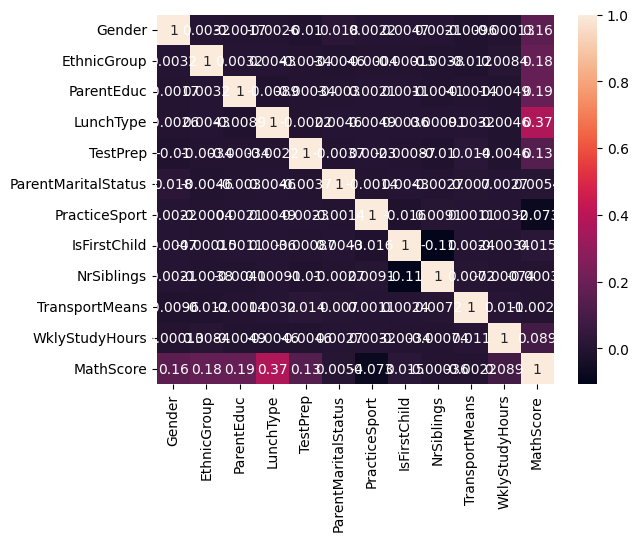

In [142]:
sns.heatmap(df2.corr(), annot=True)

In [143]:
import matplotlib.pyplot as plt

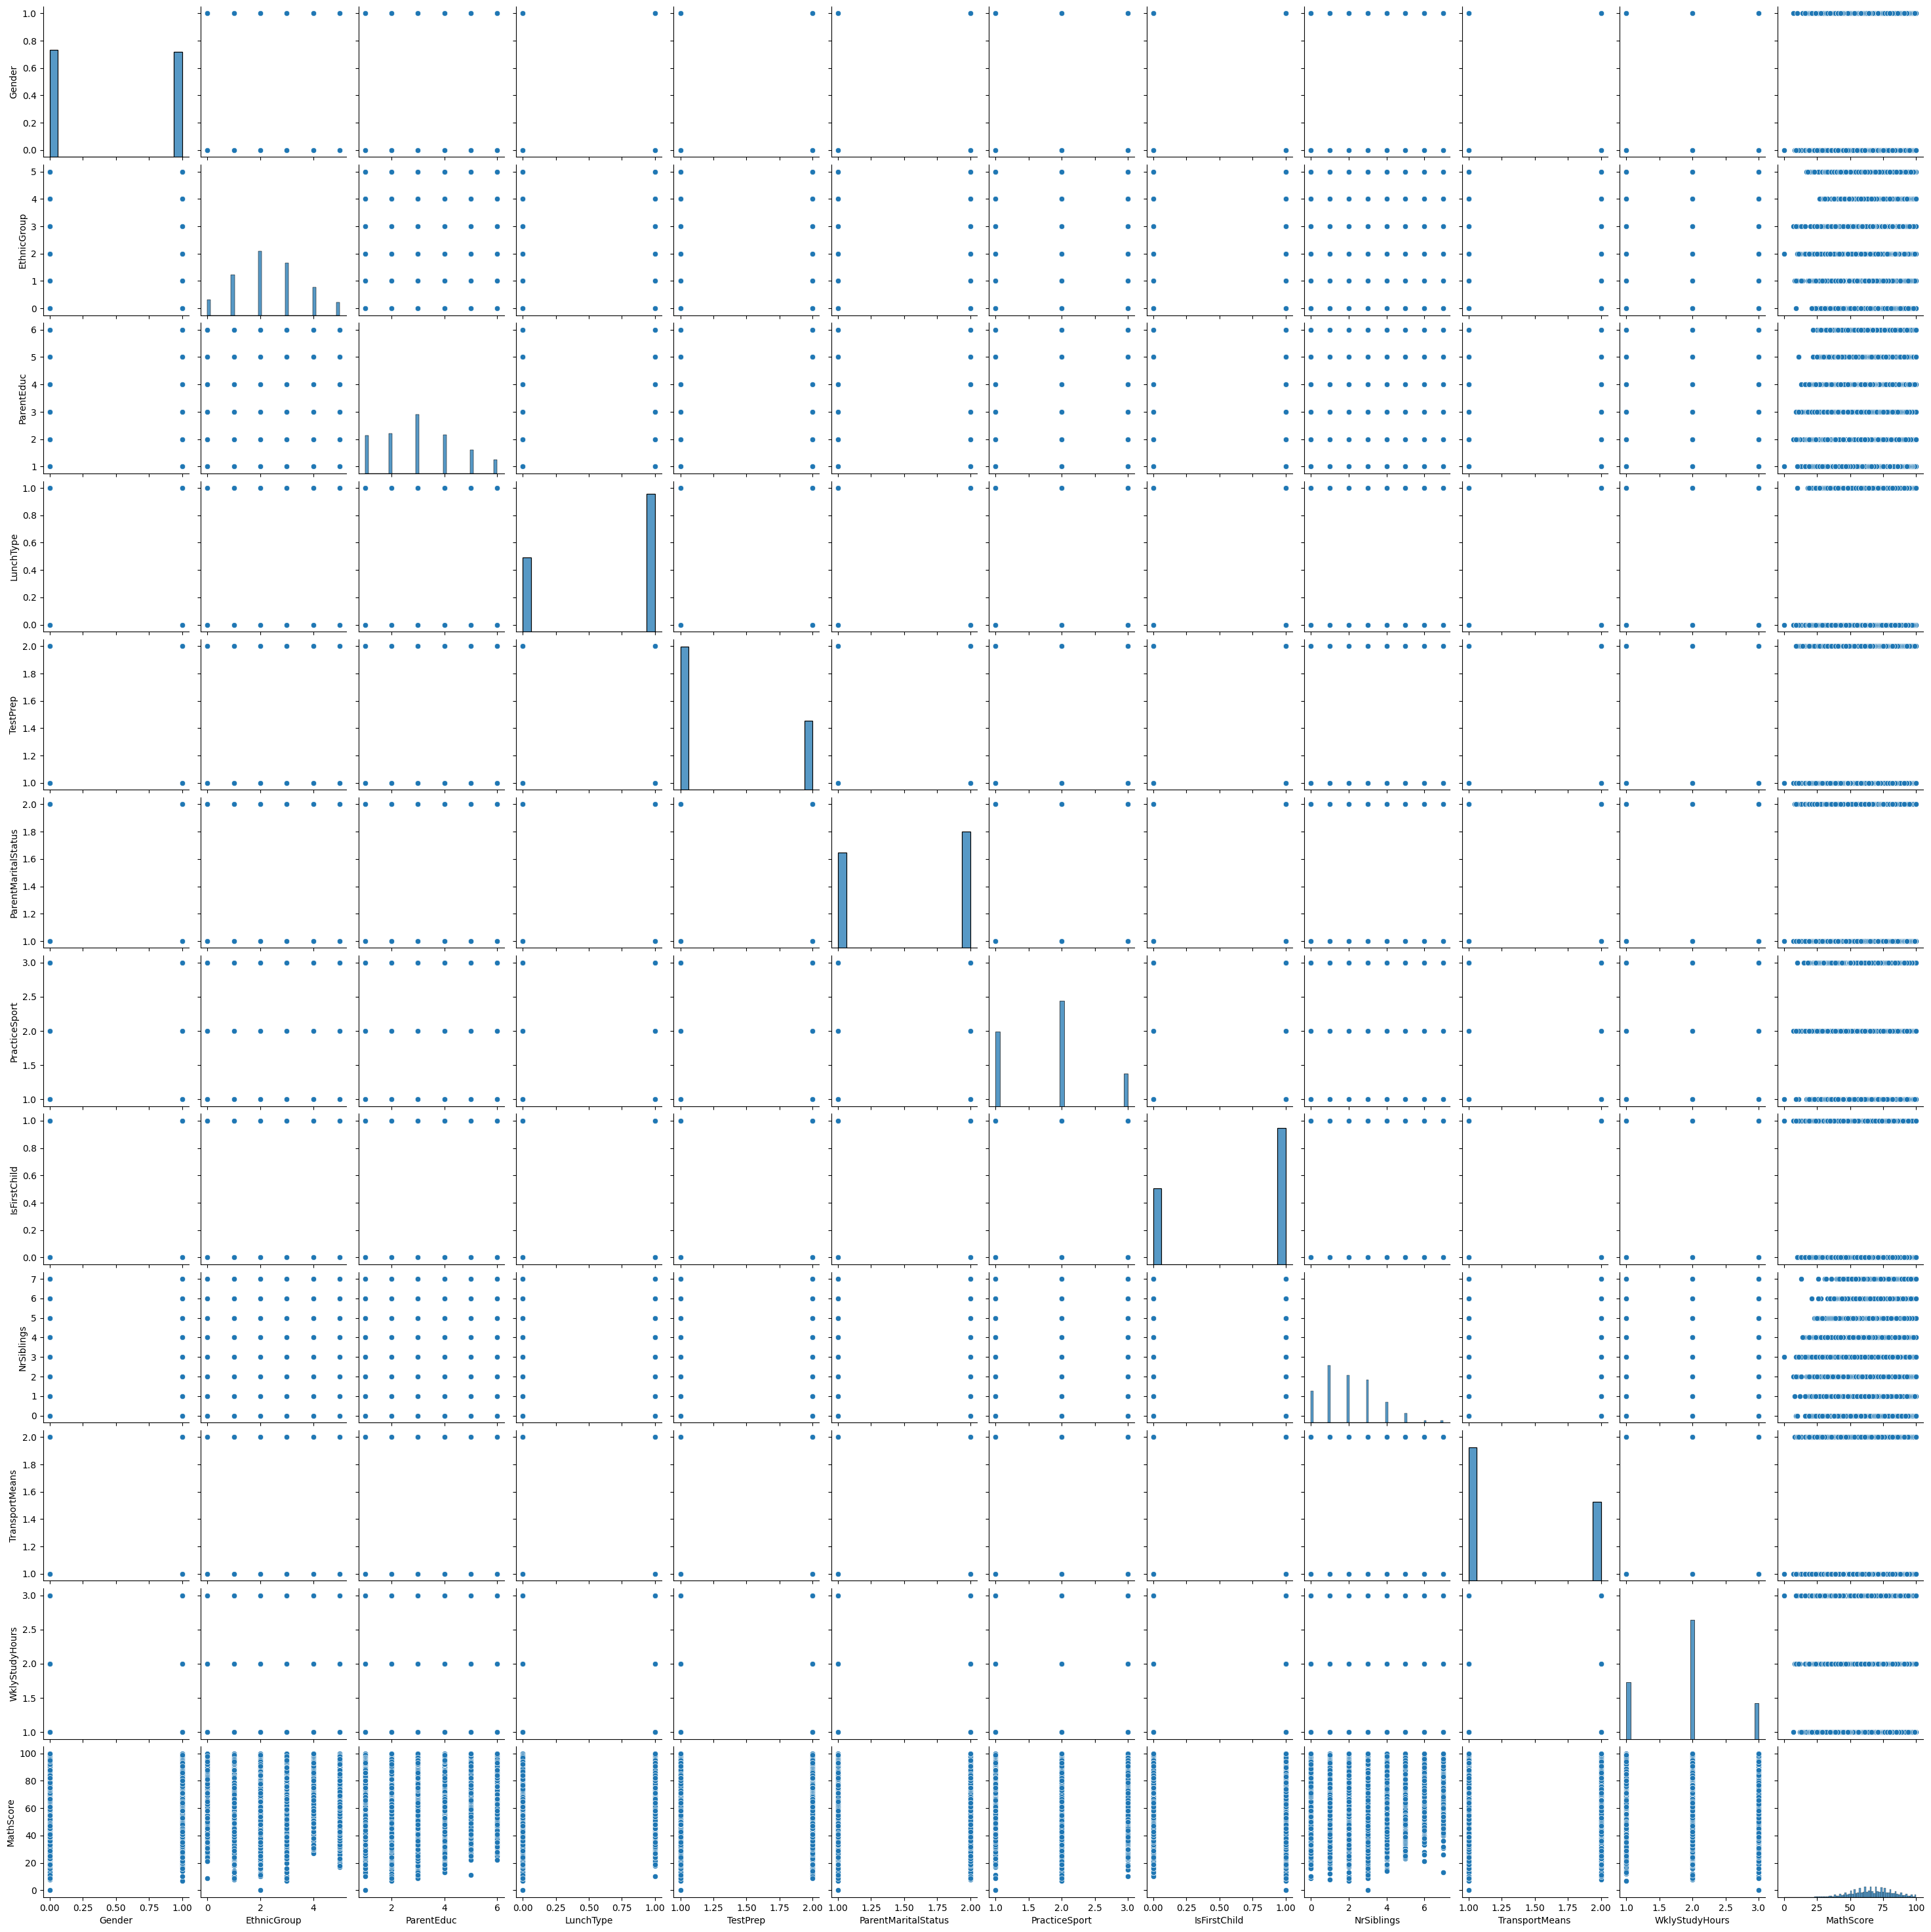

In [144]:
sns.pairplot(df2)

In [146]:
df2['NrSiblings'] = df2['NrSiblings'].astype(int)
df2.head(20)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore
0,0,5,5,1,1,2,1,1,3,1,1,71
1,0,2,3,1,1,2,2,1,0,1,2,69
2,0,1,6,1,1,1,2,1,4,1,1,87
3,1,0,4,0,1,2,3,0,1,1,2,45
4,1,2,3,1,1,2,2,1,0,1,2,76
5,0,1,4,1,1,2,1,1,1,1,2,73
6,0,1,3,1,2,1,3,0,1,2,2,85
7,1,1,3,0,1,2,2,1,1,2,3,41
8,1,3,2,0,2,1,2,0,3,2,3,65
9,0,1,2,0,1,2,1,1,0,2,1,37


In [147]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29737 entries, 0 to 30640
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               29737 non-null  int32
 1   EthnicGroup          29737 non-null  int32
 2   ParentEduc           29737 non-null  int64
 3   LunchType            29737 non-null  int32
 4   TestPrep             29737 non-null  int64
 5   ParentMaritalStatus  29737 non-null  int64
 6   PracticeSport        29737 non-null  int64
 7   IsFirstChild         29737 non-null  int32
 8   NrSiblings           29737 non-null  int32
 9   TransportMeans       29737 non-null  int64
 10  WklyStudyHours       29737 non-null  int64
 11  MathScore            29737 non-null  int64
dtypes: int32(5), int64(7)
memory usage: 3.4 MB


In [148]:
df2['MathScore'] = df2['MathScore'].apply(lambda x: 1 if x >= 70 else 0)
df2.head(20)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore
0,0,5,5,1,1,2,1,1,3,1,1,1
1,0,2,3,1,1,2,2,1,0,1,2,0
2,0,1,6,1,1,1,2,1,4,1,1,1
3,1,0,4,0,1,2,3,0,1,1,2,0
4,1,2,3,1,1,2,2,1,0,1,2,1
5,0,1,4,1,1,2,1,1,1,1,2,1
6,0,1,3,1,2,1,3,0,1,2,2,1
7,1,1,3,0,1,2,2,1,1,2,3,0
8,1,3,2,0,2,1,2,0,3,2,3,0
9,0,1,2,0,1,2,1,1,0,2,1,0


In [149]:
df2['MathScore'].value_counts()

0    16758
1    12979
Name: MathScore, dtype: int64